# Machine Learning Exercise 1.
#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



In [2]:
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#### Data loading

In [3]:
df['Gender'] = df['Gender'].apply(lambda row: 1 if row == 'Male' else 0)

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Preprocessing

In [6]:
def transform_y(x):
  if x == 'no':
    return 0
  else:
    return 1

In [7]:
columns_yn = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
df[columns_yn] = df[columns_yn].applymap(lambda x: transform_y(x))

C:\Users\tomad\AppData\Local\Temp\ipykernel_4212\3391763945.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_yn] = df[columns_yn].applymap(lambda x: transform_y(x))


In [8]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_data = encoder.fit_transform(df[['MTRANS', 'CALC', 'CAEC']])
encoded_columns = encoder.get_feature_names_out(input_features=['MTRANS', 'CALC', 'CAEC'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
df.drop(columns=['MTRANS', 'CALC', 'CAEC'],inplace=True)
df = df.join(encoded_df)

In [10]:
df['NObeyesdad'] = df.pop('NObeyesdad')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,0,2.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,0,2.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,0,1.676269,0.906247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,0,1.341390,0.599270,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,0,1.414209,0.646288,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,0,1.139107,0.586035,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III


### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_size=0.8

In [13]:
X = df.drop(columns = ['NObeyesdad']).copy()
y = df['NObeyesdad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Checking the shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1688, 26)
X_test shape: (423, 26)
y_train shape: (1688,)
y_test shape: (423,)


### Scaling impact evaluation

### SVC

In [16]:

# SVM without scaling
model_svm_unscaled = SVC(random_state=42)
model_svm_unscaled.fit(X_train, y_train)
predictions_svm_unscaled = model_svm_unscaled.predict(X_test)
svm_accuracy_unscaled = accuracy_score(y_test, predictions_svm_unscaled)

# SVM with scaling
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train)
X_test_scaled_svm = scaler_svm.transform(X_test)

model_svm_scaled = SVC(random_state=42)
model_svm_scaled.fit(X_train_scaled_svm, y_train)
predictions_svm_scaled = model_svm_scaled.predict(X_test_scaled_svm)
svm_accuracy_scaled = accuracy_score(y_test, predictions_svm_scaled)

# Compare Holdout Validation results
print("Accuracy without scaling:", svm_accuracy_unscaled)
print("Accuracy with scaling:", svm_accuracy_scaled)



Accuracy without scaling: 0.5650118203309693
Accuracy with scaling: 0.851063829787234


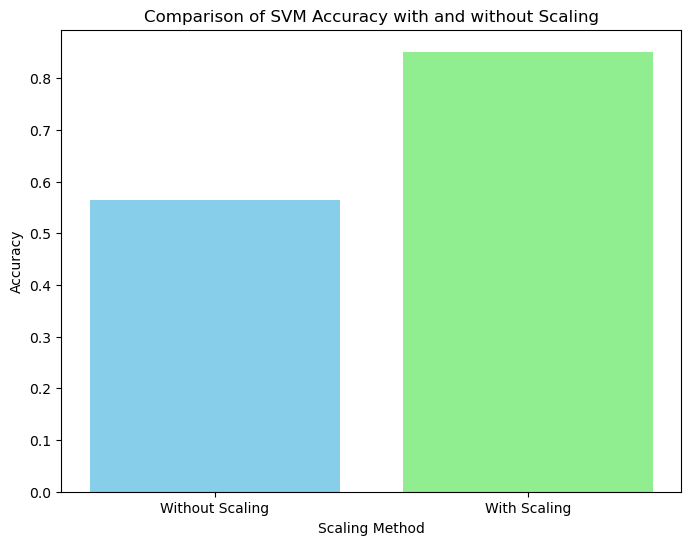

In [29]:


# Create data for the bar graph
svm_accuracies = [svm_accuracy_unscaled, svm_accuracy_scaled]
scaling_methods = ["Without Scaling", "With Scaling"]

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(scaling_methods, svm_accuracies, color=['skyblue', 'lightgreen'])
plt.xlabel("Scaling Method")
plt.ylabel("Accuracy")
plt.title("Comparison of SVM Accuracy with and without Scaling")


# Show the bar graph
plt.show()


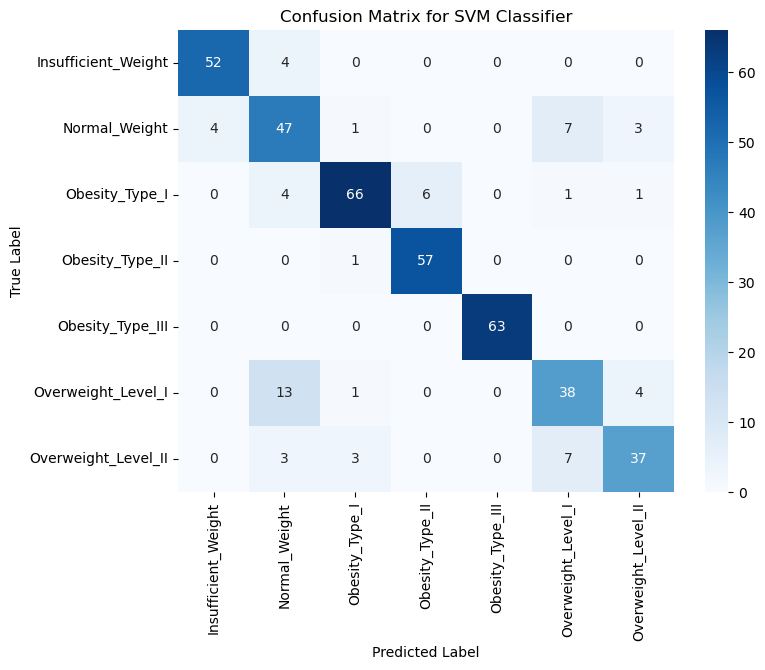

In [16]:
# Creating a confusion matrix
cm_knn = confusion_matrix(y_test, predictions_svm_scaled)
#cm_knn

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=model_svm_scaled.classes_, yticklabels=model_svm_scaled.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

### SVC  metrics for CV

In [17]:

# Cross-validation for SVC
classifier = SVC(random_state=42)
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

svm_cv_results_scaled = cross_validate(classifier, X, y, cv=5, scoring=scoring)
svm_cv_accuracy_scaled = np.mean(svm_cv_results_scaled['test_accuracy'])
svm_cv_precision_scaled = np.mean(svm_cv_results_scaled['test_precision'])
svm_cv_recall_scaled = np.mean(svm_cv_results_scaled['test_recall'])
svm_cv_f1_scaled = np.mean(svm_cv_results_scaled['test_f1'])

print("Accuracy with scaling:", svm_cv_accuracy_scaled)
print("Precision with scaling:", svm_cv_precision_scaled)
print("Recall with scaling:", svm_cv_recall_scaled)
print("F1 Score with scaling:", svm_cv_f1_scaled)


Accuracy with scaling: 0.5731684089050227
Precision with scaling: 0.5817196206576211
Recall with scaling: 0.5731684089050227
F1 Score with scaling: 0.5638133239516797


### Decision Tree

In [18]:
# Decision Tree without scaling
dt_model_unscaled = DecisionTreeClassifier(random_state=42)
dt_model_unscaled.fit(X_train, y_train)
dt_predictions_unscaled = dt_model_unscaled.predict(X_test)
dt_accuracy_unscaled = accuracy_score(y_test, dt_predictions_unscaled)


# Decision Tree with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model_scaled = DecisionTreeClassifier(random_state=42)
dt_model_scaled.fit(X_train_scaled, y_train)
dt_predictions_scaled = dt_model_scaled.predict(X_test_scaled)
dt_accuracy_scaled = accuracy_score(y_test, dt_predictions_scaled)

# Compare results
print("Accuracy without scaling:", dt_accuracy_unscaled)
print("Accuracy with scaling:", dt_accuracy_scaled)

Accuracy without scaling: 0.9432624113475178
Accuracy with scaling: 0.9432624113475178


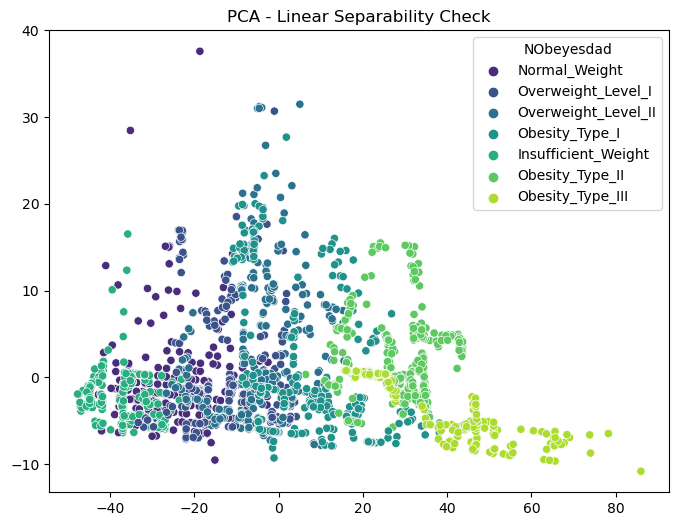

In [19]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA - Linear Separability Check')
plt.show()

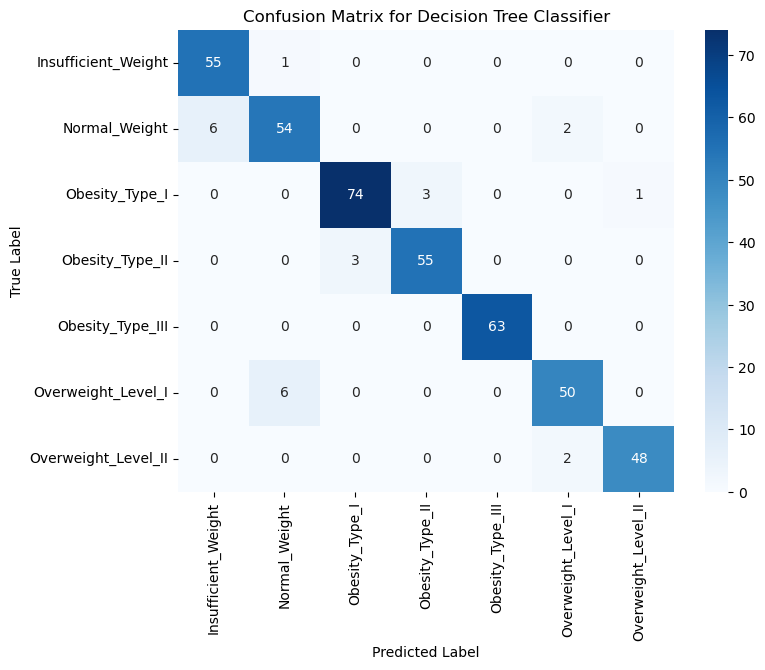

In [39]:
# Creating the confusion matrix
cm_dt = confusion_matrix(y_test, dt_predictions_scaled)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model_scaled.classes_, yticklabels=dt_model_scaled.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Decision Tree - K-fold

In [21]:
# Define the classifier
classifier = DecisionTreeClassifier(random_state=42)


# Specify the number of folds (e.g., 5 or 10)
num_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy, precision, recall, and F1 scores
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(classifier, X, y, cv=kf, scoring=scoring)

# Print the scores for each fold
for i, (accuracy, precision, recall, f1) in enumerate(zip(
    cv_results['test_accuracy'],
    cv_results['test_precision_weighted'],
    cv_results['test_recall_weighted'],
    cv_results['test_f1_weighted']
), 1):
    print(f'Fold {i}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}')

# Calculate and print the mean and standard deviation of the scores
dt_mean_cv_accuracy = np.mean(cv_results['test_accuracy'])
std_accuracy = np.std(cv_results['test_accuracy'])
dt_mean_cv_precision = np.mean(cv_results['test_precision_weighted'])
std_precision = np.std(cv_results['test_precision_weighted'])
dt_mean_cv_recall = np.mean(cv_results['test_recall_weighted'])
std_recall = np.std(cv_results['test_recall_weighted'])
dt_mean_cv_f1 = np.mean(cv_results['test_f1_weighted'])
std_f1 = np.std(cv_results['test_f1_weighted'])

print(f'\nMean Accuracy: {dt_mean_cv_accuracy:.4f} (std: {std_accuracy:.4f})')
print(f'Mean Precision: {dt_mean_cv_precision:.4f} (std: {std_precision:.4f})')
print(f'Mean Recall: {dt_mean_cv_recall:.4f} (std: {std_recall:.4f})')
print(f'Mean F1 Score: {dt_mean_cv_f1:.4f} (std: {std_f1:.4f})')


Fold 1: Accuracy = 0.9433, Precision = 0.9437, Recall = 0.9433, F1 = 0.9432
Fold 2: Accuracy = 0.9336, Precision = 0.9357, Recall = 0.9336, F1 = 0.9334
Fold 3: Accuracy = 0.9218, Precision = 0.9228, Recall = 0.9218, F1 = 0.9219
Fold 4: Accuracy = 0.9242, Precision = 0.9245, Recall = 0.9242, F1 = 0.9242
Fold 5: Accuracy = 0.9502, Precision = 0.9507, Recall = 0.9502, F1 = 0.9503

Mean Accuracy: 0.9346 (std: 0.0109)
Mean Precision: 0.9355 (std: 0.0108)
Mean Recall: 0.9346 (std: 0.0109)
Mean F1 Score: 0.9346 (std: 0.0109)


### KNN

In [22]:

# KNN without scaling
model_knn_unscaled = KNeighborsClassifier()
model_knn_unscaled.fit(X_train, y_train)
predictions_knn_unscaled = model_knn_unscaled.predict(X_test)
knn_accuracy_unscaled = accuracy_score(y_test, predictions_knn_unscaled)

# KNN with scaling
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

model_knn_scaled = KNeighborsClassifier()
model_knn_scaled.fit(X_train_scaled_knn, y_train)
predictions_knn_scaled = model_knn_scaled.predict(X_test_scaled_knn)
knn_accuracy_scaled = accuracy_score(y_test, predictions_knn_scaled)

# Compare results
print("Accuracy without scaling:", knn_accuracy_unscaled)
print("Accuracy with scaling:", knn_accuracy_scaled)

Accuracy without scaling: 0.8983451536643026
Accuracy with scaling: 0.817966903073286


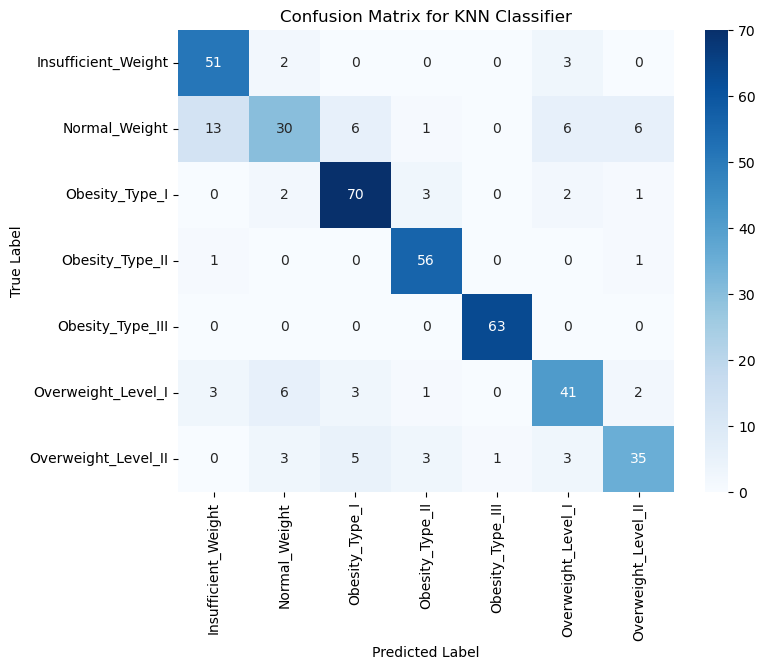

In [23]:
# Creating the confusion matrix
cm_knn = confusion_matrix(y_test, predictions_knn_scaled)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=model_knn_scaled.classes_, yticklabels=model_knn_scaled.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

### KNN metrics for CV

In [24]:
# Define the classifier
classifier = KNeighborsClassifier()

# Specify the number of folds (e.g., 5 or 10)
num_folds = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get accuracy, precision, recall, and F1 scores
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(classifier, X, y, cv=kf, scoring=scoring)

# Print the scores for each fold
for i, (accuracy, precision, recall, f1) in enumerate(zip(
    cv_results['test_accuracy'],
    cv_results['test_precision_weighted'],
    cv_results['test_recall_weighted'],
    cv_results['test_f1_weighted']
), 1):
    print(f'Fold {i}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}')

# Calculate and print the mean and standard deviation of the scores
knn_mean_cv_accuracy = np.mean(cv_results['test_accuracy'])
std_accuracy = np.std(cv_results['test_accuracy'])
knn_mean_cv_precision = np.mean(cv_results['test_precision_weighted'])
std_precision = np.std(cv_results['test_precision_weighted'])
knn_mean_cv_recall = np.mean(cv_results['test_recall_weighted'])
std_recall = np.std(cv_results['test_recall_weighted'])
knn_mean_cv_f1 = np.mean(cv_results['test_f1_weighted'])
std_f1 = np.std(cv_results['test_f1_weighted'])

print(f'\nMean Accuracy: {knn_mean_cv_accuracy:.4f} (std: {std_accuracy:.4f})')
print(f'Mean Precision: {knn_mean_cv_precision:.4f} (std: {std_precision:.4f})')
print(f'Mean Recall: {knn_mean_cv_recall:.4f} (std: {std_recall:.4f})')
print(f'Mean F1 Score: {knn_mean_cv_f1:.4f} (std: {std_f1:.4f})')


Fold 1: Accuracy = 0.8983, Precision = 0.9000, Recall = 0.8983, F1 = 0.8912
Fold 2: Accuracy = 0.8602, Precision = 0.8632, Recall = 0.8602, F1 = 0.8521
Fold 3: Accuracy = 0.8365, Precision = 0.8455, Recall = 0.8365, F1 = 0.8266
Fold 4: Accuracy = 0.8910, Precision = 0.8883, Recall = 0.8910, F1 = 0.8854
Fold 5: Accuracy = 0.8791, Precision = 0.8841, Recall = 0.8791, F1 = 0.8737

Mean Accuracy: 0.8730 (std: 0.0224)
Mean Precision: 0.8762 (std: 0.0194)
Mean Recall: 0.8730 (std: 0.0224)
Mean F1 Score: 0.8658 (std: 0.0237)


### Performance Measure Comparison

In [25]:
# Cross Validation
df_cv_measures = pd.DataFrame({
    "Classifier": ["SVM", "Decison Tree", "KNN"],
    "accurancy": [svm_cv_accuracy_scaled, dt_mean_cv_accuracy, knn_mean_cv_accuracy],
    "precision": [svm_cv_precision_scaled, dt_mean_cv_precision, knn_mean_cv_precision],
    "recall": [svm_cv_recall_scaled, dt_mean_cv_recall, knn_mean_cv_recall],
    "f1": [svm_cv_f1_scaled, dt_mean_cv_f1, knn_mean_cv_f1]
})

# Print the DF
print("Cross Validation Performance Measures:")
print(df_cv_measures)


print('-' * 80)

# Holdout Validation Accuracy scores
df_holdout_performance = pd.DataFrame({
    "Classifier": ["SVM", "Decison Tree", "KNN"],
    "accurancy": [svm_accuracy_scaled, dt_accuracy_scaled, knn_accuracy_scaled]
})

# Print the DF
print("Holdout Validation Accuracy Scores:")
print(df_holdout_performance)

Cross Validation Performance Measures:
     Classifier  accurancy  precision    recall        f1
0           SVM   0.573168   0.581720  0.573168  0.563813
1  Decison Tree   0.934624   0.935489  0.934624  0.934606
2           KNN   0.873034   0.876220  0.873034  0.865799
--------------------------------------------------------------------------------
Holdout Validation Accuracy Scores:
     Classifier  accurancy
0           SVM   0.851064
1  Decison Tree   0.943262
2           KNN   0.817967


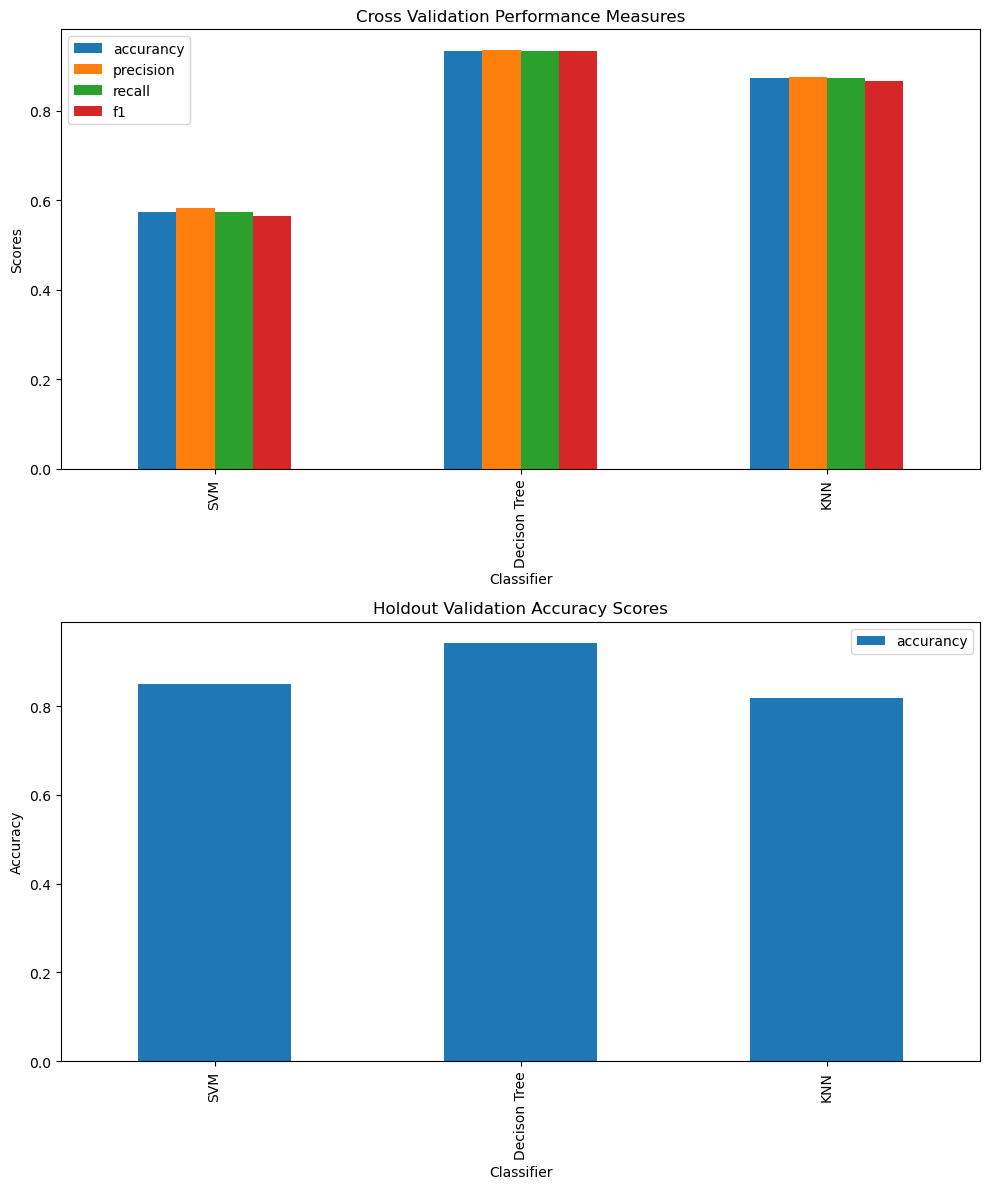

In [26]:
# Visualize the results
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Cross Validation
df_cv_measures.plot(kind='bar', x='Classifier', ax=axes[0], 
                       title='Cross Validation Performance Measures')
axes[0].set_ylabel('Scores')

# Holdout Validation
df_holdout_performance.plot(kind='bar', x='Classifier', ax=axes[1], title='Holdout Validation Accuracy Scores')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


### Measure Runtime of each Classifier

SVM Runtime: 0.08485984802246094
KNN Runtime: 0.017940998077392578
Decision Tree Runtime: 0.00844120979309082


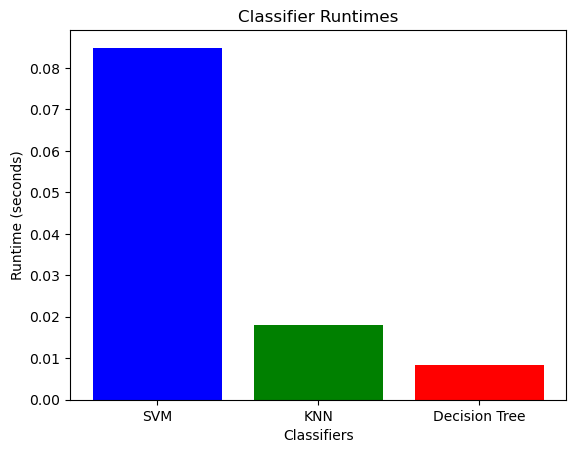

In [37]:
def measure_runtime(model, X_train, y_train, X_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, predictions

# Measure runtimes
svm_runtime, predictions_svm_scaled = measure_runtime(model_svm_scaled, X_train_scaled, y_train, X_test_scaled)
knn_runtime, predictions_knn_scaled = measure_runtime(model_knn_scaled, X_train_scaled, y_train, X_test_scaled)
dt_runtime, dt_predictions_scaled = measure_runtime(dt_model_scaled, X_train_scaled, y_train, X_test_scaled)

# Print runtimes
print("SVM Runtime:", svm_runtime)
print("KNN Runtime:", knn_runtime)
print("Decision Tree Runtime:", dt_runtime)

# Visualize runtimes in a bar graph
classifiers = ['SVM', 'KNN', 'Decision Tree']
runtimes = [svm_runtime, knn_runtime, dt_runtime]

plt.bar(classifiers, runtimes, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Runtime (seconds)')
plt.title('Classifier Runtimes')
plt.show()


### Display All Results in a df

In [27]:
# Store results in a dictionary
results_dict = {
    'Classifier': ['SVM', 'KNN', 'Decision Tree'],
    'Holdout Acc. Without Scaling': [svm_accuracy_unscaled, knn_accuracy_unscaled, dt_accuracy_unscaled],
    'Holdout Acc. With Scaling': [svm_accuracy_scaled, knn_accuracy_scaled, dt_accuracy_scaled],
    'CV Accuracy': [svm_cv_accuracy_scaled, knn_mean_cv_accuracy, dt_mean_cv_accuracy],
    'CV Precision': [svm_cv_precision_scaled, knn_mean_cv_precision, dt_mean_cv_precision],
    'CV Recall': [svm_cv_recall_scaled, knn_mean_cv_recall, dt_mean_cv_recall],
    'CV F1 Score': [svm_cv_f1_scaled, knn_mean_cv_f1, dt_mean_cv_f1]
}

# Create a DF
results_df = pd.DataFrame(results_dict)

# display DF
print(results_df)



      Classifier  Holdout Acc. Without Scaling  Holdout Acc. With Scaling  \
0            SVM                      0.565012                   0.851064   
1            KNN                      0.898345                   0.817967   
2  Decision Tree                      0.943262                   0.943262   

   CV Accuracy  CV Precision  CV Recall  CV F1 Score  
0     0.573168      0.581720   0.573168     0.563813  
1     0.873034      0.876220   0.873034     0.865799  
2     0.934624      0.935489   0.934624     0.934606  
